In [1]:
import pandas as pd
# Set pandas options to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore', category=pd.errors.PerformanceWarning)

from xgboost import XGBRegressor
import sklearn
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [2]:
df = pd.read_csv('D:/Python Projects/git_projects/BESS/data/raw/merged_df_2024_cleaned.csv')

In [3]:
df['season'] = df['season'].map({'winter': 0, 'summer': 1})

In [4]:
df.head()

,datetime_,pool_price,forecast_pool_price,rolling_30day_avg_price,alberta_internal_load,forecast_alberta_internal_load,solar_generation,wind_generation,temp_calgary,temp_edmonton,temp_fortmc,ws_calgary,ws_edmonton,ws_fortmc,hour_of_day,day_of_week,week_of_month,month,season,pool_price_lag_1,pool_price_lag_2,pool_price_lag_3,pool_price_lag_4,pool_price_lag_5,pool_price_lag_6,pool_price_lag_7,pool_price_lag_8,pool_price_lag_9,pool_price_lag_10,pool_price_lag_11,pool_price_lag_12,pool_price_lag_13,pool_price_lag_14,pool_price_lag_15,pool_price_lag_16,pool_price_lag_17,pool_price_lag_18,pool_price_lag_19,pool_price_lag_20,pool_price_lag_21,pool_price_lag_22,pool_price_lag_23,pool_price_lag_24,alberta_internal_load_lag_1,alberta_internal_load_lag_2,alberta_internal_load_lag_3,alberta_internal_load_lag_4,alberta_internal_load_lag_5,alberta_internal_load_lag_6,alberta_internal_load_lag_7,alberta_internal_load_lag_8,alberta_internal_load_lag_9,alberta_internal_load_lag_10,alberta_internal_load_lag_11,alberta_internal_load_lag_12,alberta_internal_load_lag_13,alberta_internal_load_lag_14,alberta_internal_load_lag_15,alberta_internal_load_lag_16,alberta_internal_load_lag_17,alberta_internal_load_lag_18,alberta_internal_load_lag_19,alberta_internal_load_lag_20,alberta_internal_load_lag_21,alberta_internal_load_lag_22,alberta_internal_load_lag_23,alberta_internal_load_lag_24
0,2024-01-01 00:00:00,23.05,20.57,51.98,9809.0,9779.0,0.0,2905.627906,3.0,-0.5,2.5,8.0,10.0,16.0,0,0,1,1,0,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0
1,2024-01-01 01:00:00,22.67,19.69,51.97,9702.0,9709.0,0.0,2857.032152,3.0,-2.5,2.0,5.0,7.0,16.0,1,0,1,1,0,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0
2,2024-01-01 02:00:00,24.07,21.46,51.96,9560.0,9615.0,0.0,2519.803339,3.2,-4.3,0.7,5.0,9.0,16.0,2,0,1,1,0,22.67,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,9702.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0
3,2024-01-01 03:00:00,24.33,24.21,51.93,9547.0,9510.0,0.0,2386.924303,2.9,-3.5,-0.5,16.0,12.0,14.0,3,0,1,1,0,24.07,22.67,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,9560.0,9702.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0
4,2024-01-01 04:00:00,24.70,24.48,51.93,9511.0,9545.0,0.0,2222.338043,2.4,-4.7,0.1,19.0,5.0,16.0,4,0,1,1,0,24.33,24.07,22.67,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,23.05,9547.0,9560.0,9702.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0,9809.0


In [ ]:
# Convert datetime_ column to datetime type
df['datetime_'] = pd.to_datetime(df['datetime_'])

# Filter data for the first 11 months
train_data = df[df['datetime_'] < '2024-12-01']
test_data = df[df['datetime_'] >= '2024-12-01']

# Define independent variables (features) and target variable
# X_train = train_data[['solar_generation', 'wind_generation', 'temp_calgary', 'temp_edmonton', 'temp_fortmc']]
X_train = train_data.drop(columns=['datetime_', 'pool_price'])
y_train = train_data['pool_price']

# Display the shapes of the training data
print(X_train.shape, y_train.shape)


# Filter data for the first 6 months
test_data = df[df['datetime_'] >= '2024-12-01']

# Define independent variables (features) and target variable
X_test = test_data.drop(columns=['datetime_', 'pool_price'])
y_test = test_data['pool_price']

# Display the shapes of the training data
print(X_test.shape, y_test.shape)

(8043, 65) (8043,)
(744, 65) (744,)


In [ ]:
#Converting dataframe to numpy

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [ ]:
#Reshaping the train and test data to pass into the LSTM layer

X_train = X_train.reshape((X_train.shape[0], 1, int(X_train.shape[1])))
X_test = X_test.reshape((X_test.shape[0], 1, int(X_test.shape[1])))

In [24]:
X_train.shape()


KeyboardInterrupt



In [ ]:
#Baseline LSTM model

model = tf.keras.Sequential()
model.add(LSTM(128, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
#model.add(Dense(24, activation=None))
model.add(Dense(1, activation=None))
model.compile(optimizer='adam', loss='mae')

history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), verbose=2)



d:\Python3.11\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
126/126 - 5s - 41ms/step - loss: 81.2298 - val_loss: 35.0814
Epoch 2/100
126/126 - 1s - 7ms/step - loss: 48.0161 - val_loss: 70.8374
Epoch 3/100
126/126 - 1s - 5ms/step - loss: 42.0521 - val_loss: 23.4847
Epoch 4/100
126/126 - 1s - 5ms/step - loss: 44.2959 - val_loss: 19.5339
Epoch 5/100
126/126 - 1s - 6ms/step - loss: 34.8502 - val_loss: 59.0429
Epoch 6/100
126/126 - 1s - 6ms/step - loss: 41.1788 - val_loss: 31.8281
Epoch 7/100
126/126 - 1s - 6ms/step - loss: 31.6224 - val_loss: 13.7957
Epoch 8/100
126/126 - 1s - 5ms/step - loss: 46.0034 - val_loss: 67.7771
Epoch 9/100
126/126 - 1s - 5ms/step - loss: 30.2144 - val_loss: 14.1419
Epoch 10/100
126/126 - 1s - 6ms/step - loss: 45.3077 - val_loss: 30.6363
Epoch 11/100
126/126 - 1s - 6ms/step - loss: 34.8147 - val_loss: 22.8022
Epoch 12/100
126/126 - 1s - 5ms/step - loss: 29.1593 - val_loss: 39.8171
Epoch 13/100
126/126 - 1s - 5ms/step - loss: 30.4327 - val_loss: 23.2274
Epoch 14/100
126/126 - 1s - 5ms/step - loss: 24.3192 - val_

In [22]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error on the test set : {mae}')

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
Mean Absolute Error on the test set : 7.686604871639121


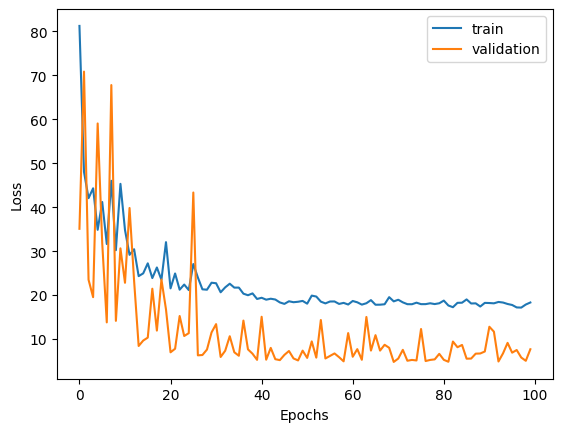

In [23]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

array([[ 29.214226 ],
       [ 26.983383 ],
       [ 32.575455 ],
       [ 32.160217 ],
       [ 33.139484 ],
       [ 37.98352  ],
       [ 38.53643  ],
       [ 47.958527 ],
       [ 51.41269  ],
       [ 54.24362  ],
       [ 56.6292   ],
       [ 57.13246  ],
       [ 62.753464 ],
       [ 80.093445 ],
       [ 91.65571  ],
       [ 88.82565  ],
       [101.81253  ],
       [ 64.19541  ],
       [ 56.26011  ],
       [ 46.125507 ],
       [ 38.704227 ],
       [ 41.704132 ],
       [ 44.889816 ],
       [ 27.897017 ],
       [ 20.227158 ],
       [ 24.990479 ],
       [ 25.503897 ],
       [ 20.23124  ],
       [ 25.27549  ],
       [ 26.796337 ],
       [ 27.013884 ],
       [ 32.754364 ],
       [ 28.309042 ],
       [ 25.546734 ],
       [ 21.314682 ],
       [ 28.202812 ],
       [ 40.258842 ],
       [ 35.306705 ],
       [ 36.71498  ],
       [ 37.839108 ],
       [ 40.116554 ],
       [ 37.380424 ],
       [ 31.221348 ],
       [ 20.465727 ],
       [ 21.630106 ],
       [ 2